# Validation Tools


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

## Get Datas

In [3]:
hr_df = pd.read_csv('./HR_comma_sep.csv')

hr_df.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


## EDA

In [5]:
# Missing Values
hr_df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

<AxesSubplot:>

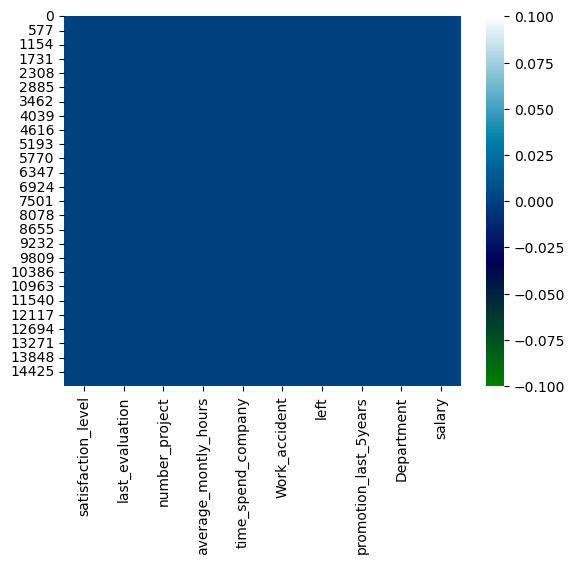

In [7]:
sns.heatmap(hr_df.isnull(), cmap="ocean") # cmap : white, gray, etc...

In [12]:
# How many employees are in DB
hr_df.shape

(14999, 10)

#### Q. How many employees left company ?

In [8]:
hr_df.left.unique()

array([1, 0], dtype=int64)

In [15]:
left = hr_df[hr_df.left == 1]

print(f'{left.shape[0]} left the company')

3571 left the company


In [16]:
retained = hr_df[hr_df.left == 0]

print(f'{retained.shape[0]} remained in the company')

11428 remained in the company


How much the others parameters influence the target [ left]?

In [19]:
grp_left = hr_df.groupby('left').mean()
grp_left

C:\Users\didie\AppData\Local\Temp\ipykernel_18700\3298428457.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grp_left = hr_df.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<AxesSubplot:xlabel='left'>

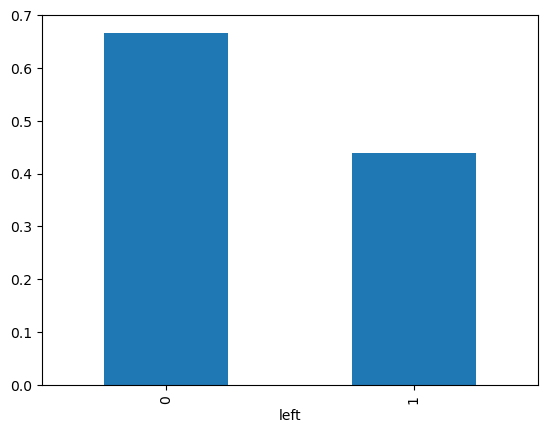

In [24]:
grp_left['satisfaction_level'].plot(kind='bar')

Brief Conclusions:
+ *satisfaction_level* relatively low for leaving employees(44%) **VS** (66%) for retained empls.
+ *average_montly_hours* higher for leaving employees
+ *Promotion Last 5 Years* higher rated for retained employees

### Frequencies Tables 
using Crosstab

In [28]:
sal_left_df = pd.crosstab(hr_df.salary, hr_df.left)

sal_left_df.columns = ['left', 'stayed']
sal_left_df

,left,stayed
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


<AxesSubplot:xlabel='salary'>

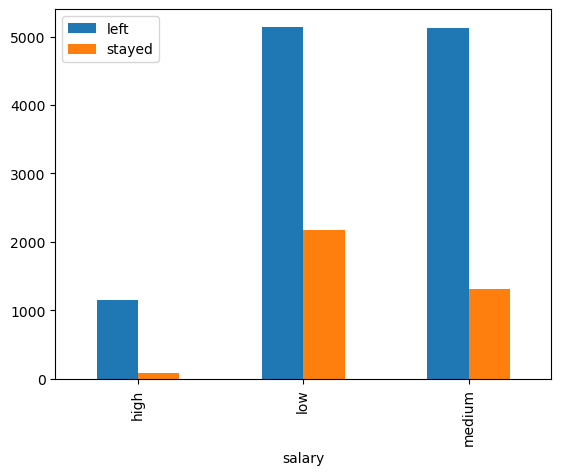

In [29]:
sal_left_df.plot(kind='bar')

<AxesSubplot:xlabel='Department'>

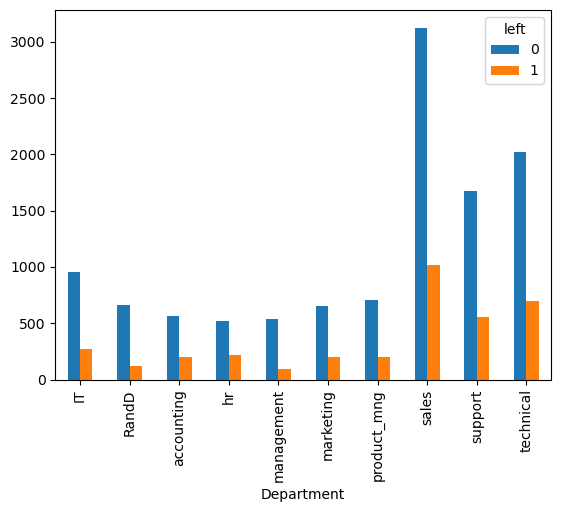

In [30]:
pd.crosstab(hr_df.Department, hr_df.left).plot(kind='bar')

Correlation

In [31]:
hr_df.corr()

C:\Users\didie\AppData\Local\Temp\ipykernel_18700\2926902640.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hr_df.corr()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


C:\Users\didie\AppData\Local\Temp\ipykernel_18700\2756715732.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(hr_df.corr())


<AxesSubplot:>

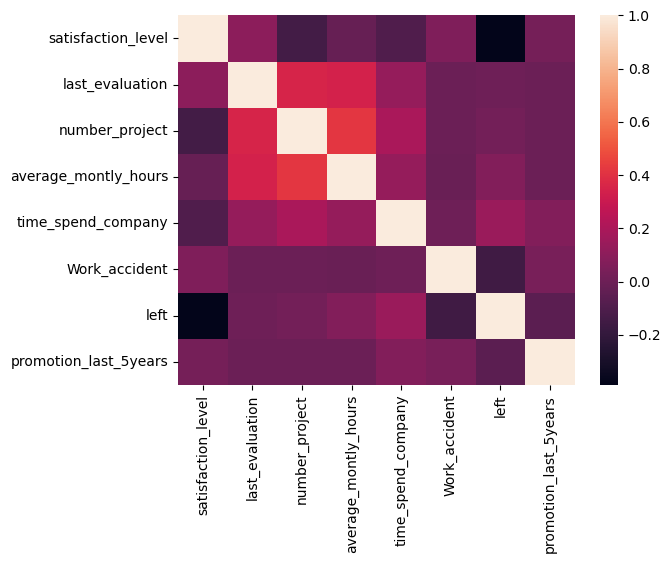

In [32]:
sns.heatmap(hr_df.corr())

I will choose to keep:


0. Satisfaction level
1. Average monthly hours
2. Promotion last 5 y
3. Salary
4. Departement

In [33]:
hr_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [34]:
df = hr_df[['satisfaction_level', 
            'average_montly_hours', 
            'promotion_last_5years', 
            'Department', 
            'salary',
            'left'
            ]]
df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,Department,salary,left
0,0.38,157,0,sales,low,1
1,0.80,262,0,sales,medium,1
2,0.11,272,0,sales,medium,1
3,0.72,223,0,sales,low,1
4,0.37,159,0,sales,low,1


### Preprocessing of datas

*Categorical Variables*

In [37]:
df.columns[df.dtypes == "object"]

Index(['Department', 'salary'], dtype='object')

In [38]:
categoricals = df.columns[df.dtypes == "object"]

In [39]:
pd.get_dummies(df, categoricals)

,satisfaction_level,average_montly_hours,promotion_last_5years,left,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,157,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,262,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,272,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,223,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,159,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,151,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
14995,0.37,160,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
14996,0.37,143,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
14997,0.11,280,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0


In [40]:
pd.get_dummies(df, categoricals, drop_first= True)

,satisfaction_level,average_montly_hours,promotion_last_5years,left,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,157,0,1,0,0,0,0,0,0,1,0,0,1,0
1,0.80,262,0,1,0,0,0,0,0,0,1,0,0,0,1
2,0.11,272,0,1,0,0,0,0,0,0,1,0,0,0,1
3,0.72,223,0,1,0,0,0,0,0,0,1,0,0,1,0
4,0.37,159,0,1,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,151,0,1,0,0,0,0,0,0,0,1,0,1,0
14995,0.37,160,0,1,0,0,0,0,0,0,0,1,0,1,0
14996,0.37,143,0,1,0,0,0,0,0,0,0,1,0,1,0
14997,0.11,280,0,1,0,0,0,0,0,0,0,1,0,1,0


In [43]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [44]:
df.salary = df.salary.replace(
    {
    'low': 1, 
    'medium': 2, 
    'high': 3
    }
)

C:\Users\didie\AppData\Local\Temp\ipykernel_18700\3508936263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.salary = df.salary.replace(


In [45]:
df.salary.unique()

array([1, 2, 3], dtype=int64)

In [46]:
pd.get_dummies(df, columns=['Department'], drop_first=True)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,157,0,1,1,0,0,0,0,0,0,1,0,0
1,0.80,262,0,2,1,0,0,0,0,0,0,1,0,0
2,0.11,272,0,2,1,0,0,0,0,0,0,1,0,0
3,0.72,223,0,1,1,0,0,0,0,0,0,1,0,0
4,0.37,159,0,1,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,151,0,1,1,0,0,0,0,0,0,0,1,0
14995,0.37,160,0,1,1,0,0,0,0,0,0,0,1,0
14996,0.37,143,0,1,1,0,0,0,0,0,0,0,1,0
14997,0.11,280,0,1,1,0,0,0,0,0,0,0,1,0


In [48]:
df_with_dummies = pd.get_dummies(df, columns=['Department'], drop_first=True)

### Features and target

X & y

In [52]:
X = df_with_dummies.drop(columns='left', axis=1)
y = df_with_dummies.left


### Validation Tools

#### 1. Train Test Split

In [70]:
# 1. Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=50)

Log Reg

In [71]:
# Log Reg
from sklearn.linear_model import LogisticRegression

log = LogisticRegression().fit(X_train, y_train)
log.score(X_test, y_test)

c:\Users\didie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.775

KNeighbors Classifier

In [72]:
# KNeighbors Classifier

from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier().fit(X_train, y_train)
KNN.score(X_test, y_test)

0.8393333333333334

Decision Tree

In [73]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

Tree = DecisionTreeClassifier().fit(X_train, y_train)

Tree.score(X_test, y_test)

0.9423333333333334

#### 2. Cross Validation

In [78]:
from sklearn.model_selection import cross_val_score, validation_curve, learning_curve


# 
def my_cross_val(model, param, range, cv):

    val_score = []

    for k in range:
        score = cross_val_score(
            model(param=k), 
            X_train, 
            y_train, 
            cv=cv, 
            scoring = 'accuracy'
            ).mean()
        
        val_score.append(score)
        
    return val_score

Log Reg Cross Val

c:\Users\didie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\didie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

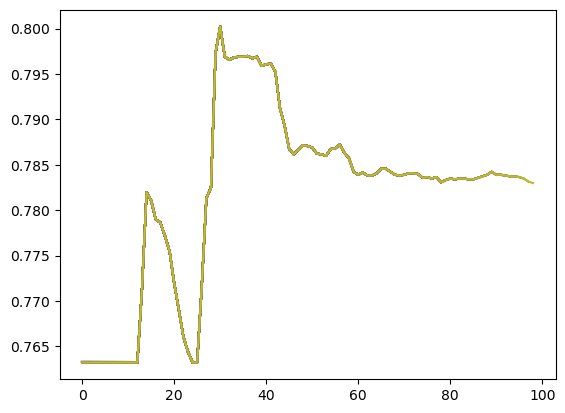

In [89]:

# Log Reg
val_score = []

for k in range(1, 100):
    score = cross_val_score(
        LogisticRegression(max_iter=k), 
        X_train, 
        y_train, 
        cv=5, 
        scoring = 'accuracy'
        ).mean()
    
    val_score.append(score)
    
    plt.plot(val_score)

Cross Val Knn

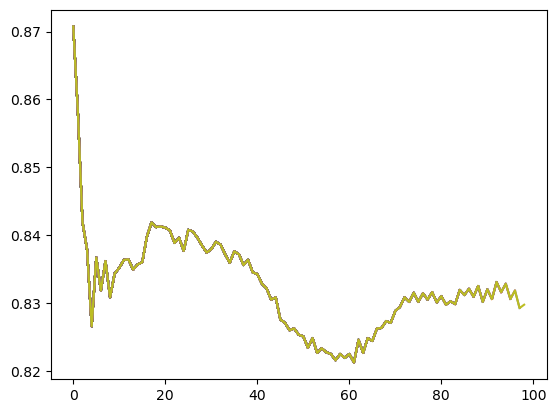

In [93]:


# KNN
val_score = []

for k in range(1, 100):
    score = cross_val_score(
        KNeighborsClassifier(n_neighbors=k),
        X_train,
        y_train,
        cv=5,
        scoring='accuracy'
    ).mean()

    val_score.append(score)

    plt.plot(val_score)

Cross Val Dec Tree

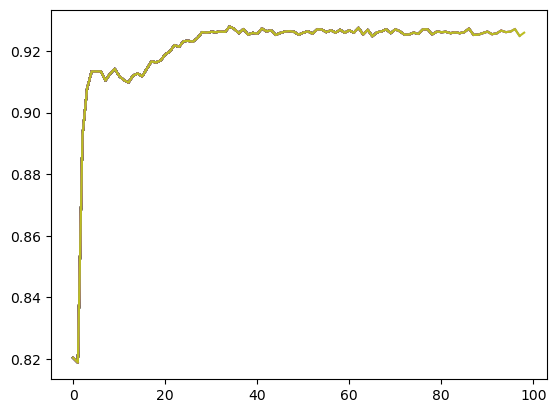

In [94]:

# Decision Tree
val_score = []

for k in range(1, 100):
    score = cross_val_score(
        DecisionTreeClassifier(max_depth=k),
        X_train,
        y_train,
        cv=5,
        scoring='accuracy'
    ).mean()

    val_score.append(score)

    plt.plot(val_score)

#### 3. Validation Curve

c:\Users\didie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\didie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

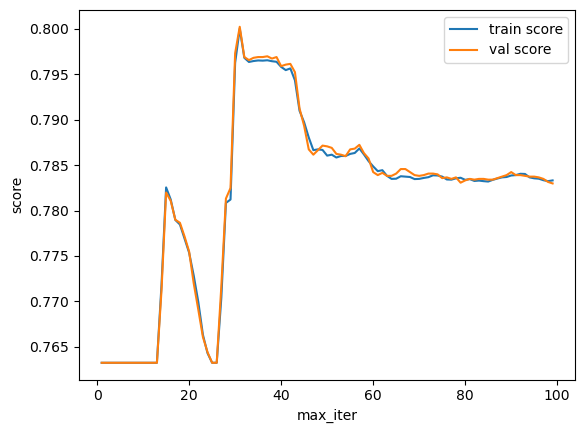

In [91]:
log_ = LogisticRegression()
k = np.arange(1, 100)


train_score, val_score = validation_curve(
    log_,
    X_train,
    y_train,
    param_name="max_iter",
    param_range=k,
    cv=5,
    scoring='accuracy'
)

plt.plot(k, train_score.mean(axis=1), label="train score")
plt.plot(k, val_score.mean(axis=1), label="val score")

plt.xlabel('max_iter')
plt.ylabel('score')
plt.legend()

Validation Curve KNN

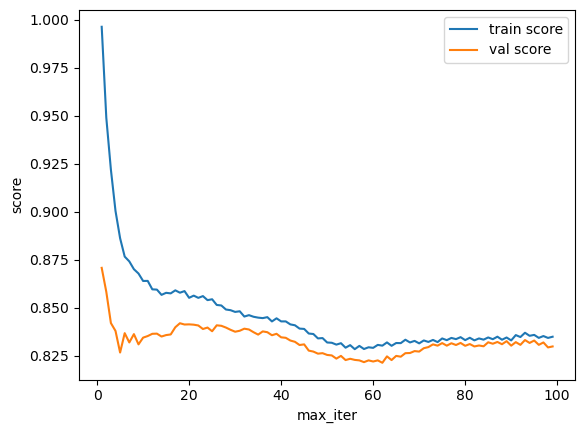

In [95]:
KNN_ = KNeighborsClassifier()
k = np.arange(1, 100)


train_score, val_score = validation_curve(
    KNN_,
    X_train,
    y_train,
    param_name="n_neighbors",
    param_range=k,
    cv=5,
    scoring='accuracy'
)

plt.plot(k, train_score.mean(axis=1), label="train score")
plt.plot(k, val_score.mean(axis=1), label="val score")

plt.xlabel('max_iter')
plt.ylabel('score')
plt.legend()

Validation curve Decision Tree

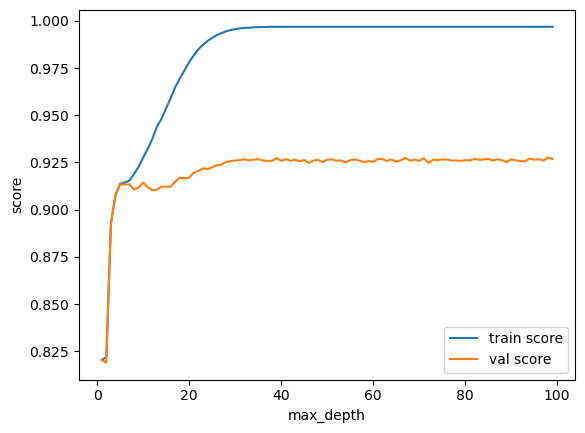

In [98]:
DTree_ = DecisionTreeClassifier()
k = np.arange(1, 100)


train_score, val_score = validation_curve(
    DTree_,
    X_train,
    y_train,
    param_name="max_depth",
    param_range=k,
    cv=5,
    scoring='accuracy'
)

plt.plot(k, train_score.mean(axis=1), label="train score")
plt.plot(k, val_score.mean(axis=1), label="val score")

plt.xlabel('max_depth')
plt.ylabel('score')
plt.legend()

#### 4. Learning Curve

Log Reg

c:\Users\didie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\didie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

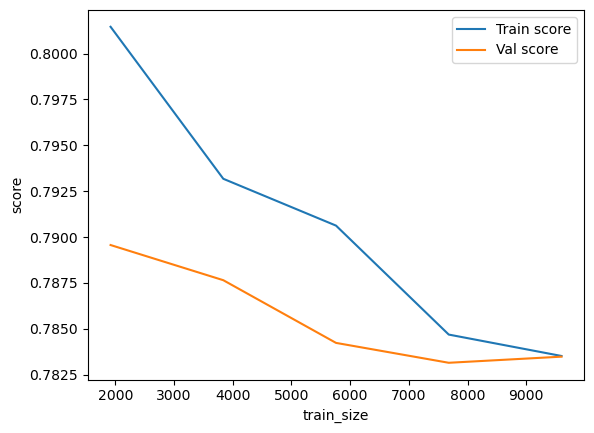

In [100]:
N, train_score, val_score = learning_curve(
                            log,
                            X_train,
                            y_train,
                            train_sizes=np.linspace(.2, 1.0, num=5),
                            cv = 5
)

plt.plot(N, train_score.mean(axis=1), label="Train score")
plt.plot(N, val_score.mean(axis=1), label="Val score")


plt.xlabel("train_size")
plt.ylabel("score")

plt.legend()

Learning Curve KNN

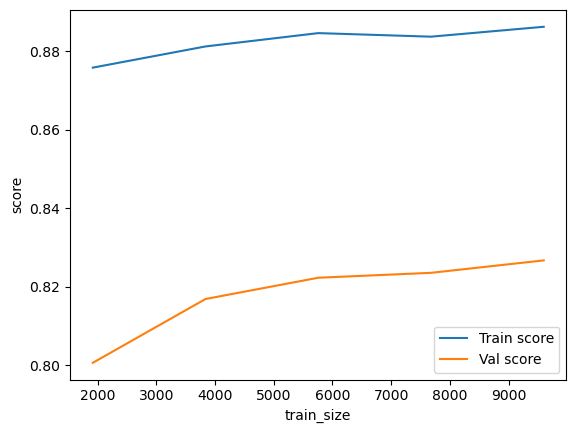

In [101]:
N, train_score, val_score = learning_curve(
    KNN,
    X_train,
    y_train,
    train_sizes=np.linspace(.2, 1.0, num=5),
    cv=5
)

plt.plot(N, train_score.mean(axis=1), label="Train score")
plt.plot(N, val_score.mean(axis=1), label="Val score")


plt.xlabel("train_size")
plt.ylabel("score")

plt.legend()

Learning Curve DTree

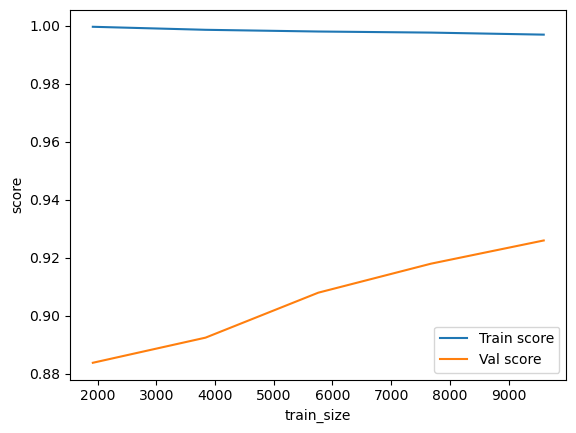

In [102]:
N, train_score, val_score = learning_curve(
    Tree,
    X_train,
    y_train,
    train_sizes=np.linspace(.2, 1.0, num=5),
    cv=5
)

plt.plot(N, train_score.mean(axis=1), label="Train score")
plt.plot(N, val_score.mean(axis=1), label="Val score")


plt.xlabel("train_size")
plt.ylabel("score")

plt.legend()

#### 5 Confusion Matrix

array([[2135,  135],
       [ 540,  190]], dtype=int64)

<AxesSubplot:>

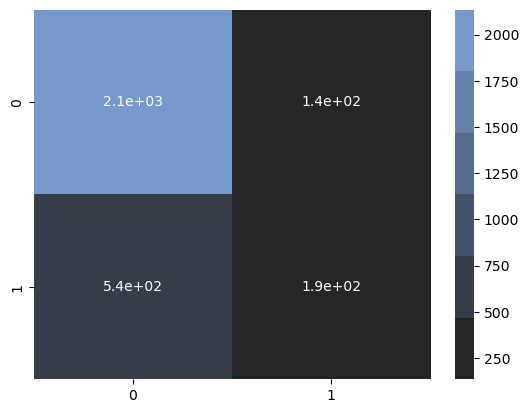

In [111]:
from sklearn.metrics import confusion_matrix, classification_report

real_labels_of_test_dataset = y_test
predicted_labels = log.predict(X_test)
display(confusion_matrix(
    real_labels_of_test_dataset,
    predicted_labels
    ))

cm = confusion_matrix(
    real_labels_of_test_dataset,
    predicted_labels
)

sns.heatmap(cm, cmap=sns.dark_palette("#79C"), annot=True)

Confusion KNN

array([[2051,  219],
       [ 263,  467]], dtype=int64)

<AxesSubplot:>

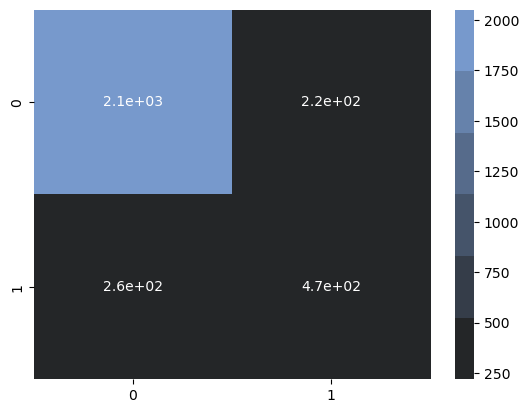

In [112]:
from sklearn.metrics import confusion_matrix, classification_report

real_labels_of_test_dataset = y_test
predicted_labels = KNN.predict(X_test)
display(confusion_matrix(
    real_labels_of_test_dataset,
    predicted_labels
))

cm = confusion_matrix(
    real_labels_of_test_dataset,
    predicted_labels
)

sns.heatmap(cm, cmap=sns.dark_palette("#79C"), annot=True)

array([[2157,  113],
       [  60,  670]], dtype=int64)

<AxesSubplot:>

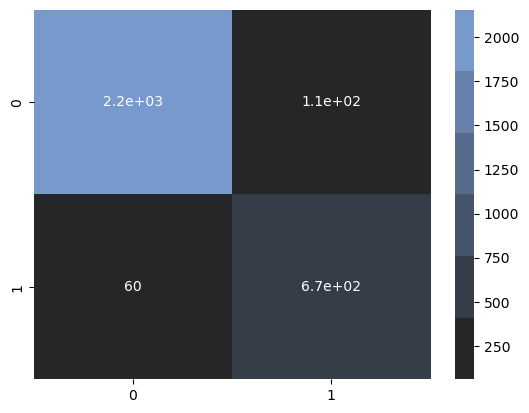

In [113]:
from sklearn.metrics import confusion_matrix, classification_report

real_labels_of_test_dataset = y_test
predicted_labels = Tree.predict(X_test)
display(confusion_matrix(
    real_labels_of_test_dataset,
    predicted_labels
))

cm = confusion_matrix(
    real_labels_of_test_dataset,
    predicted_labels
)

sns.heatmap(cm, cmap=sns.dark_palette("#79C"), annot=True)